In [ ]:
# installing kaggle
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"abdullahalsudani","key":"e39b63852edbce7db5e0150ec7fd4983"}'}

In [ ]:
# Creating the directory

!mkdir -p ~/.kaggle

!mv kaggle*.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset from kaggle

!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset
License(s): copyright-authors
novel-corona-virus-2019-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the dataset

!unzip novel-corona-virus-2019-dataset.zip -d /content/covid19_data

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: /content/covid19_data/covid_19_data.csv  
  inflating: /content/covid19_data/time_series_covid_19_confirmed.csv  
  inflating: /content/covid19_data/time_series_covid_19_confirmed_US.csv  
  inflating: /content/covid19_data/time_series_covid_19_deaths.csv  
  inflating: /content/covid19_data/time_series_covid_19_deaths_US.csv  
  inflating: /content/covid19_data/time_series_covid_19_recovered.csv  


In [ ]:
# Importing libraries
import pandas as pd
import os

In [ ]:
# Define Path

covid_data_path = '/content/covid19_data'

In [ ]:
# List files in directory

files = os.listdir(covid_data_path)
print(files)

['time_series_covid_19_confirmed_US.csv', 'time_series_covid_19_recovered.csv', 'time_series_covid_19_deaths_US.csv', 'time_series_covid_19_deaths.csv', 'time_series_covid_19_confirmed.csv', 'covid_19_data.csv']


In [ ]:
# Load the datasets

covid_data = pd.read_csv(os.path.join(covid_data_path, 'covid_19_data.csv'))

In [ ]:
#Display first few rows

print("COVID-19 Data")
print(covid_data.head())

COVID-19 Data
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [ ]:
# Date columns to datetime
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

In [ ]:
# Checking for missing values

print("COVID-19 Data Missing Values")
print(covid_data.isnull().sum())

COVID-19 Data Missing Values
SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [ ]:
# Missing values

covid_data.dropna(inplace=True)

In [ ]:
# Displaying our work (Cleaned)

print("Cleaned COVID-19 Data")
print(covid_data.info())

Cleaned COVID-19 Data
<class 'pandas.core.frame.DataFrame'>
Index: 228326 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              228326 non-null  int64         
 1   ObservationDate  228326 non-null  datetime64[ns]
 2   Province/State   228326 non-null  object        
 3   Country/Region   228326 non-null  object        
 4   Last Update      228326 non-null  object        
 5   Confirmed        228326 non-null  float64       
 6   Deaths           228326 non-null  float64       
 7   Recovered        228326 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 15.7+ MB
None


In [ ]:
# Exploratory data analysis

print("COVID-19 Data Descriptive Statistics")
print(covid_data.describe())

COVID-19 Data Descriptive Statistics
                 SNo                ObservationDate     Confirmed  \
count  228326.000000                         228326  2.283260e+05   
mean   158732.777113  2020-11-14 03:17:45.686780928  8.021381e+04   
min         1.000000            2020-01-22 00:00:00 -3.028440e+05   
25%     85431.250000            2020-08-11 00:00:00  1.225000e+03   
50%    159305.500000            2020-11-18 00:00:00  1.175750e+04   
75%    232835.750000            2021-02-22 00:00:00  4.841125e+04   
max    306429.000000            2021-05-29 00:00:00  5.713215e+06   
std     85862.065298                            NaN  2.493661e+05   

              Deaths     Recovered  
count  228326.000000  2.283260e+05  
mean     1961.373273  4.184345e+04  
min      -178.000000 -8.544050e+05  
25%        15.000000  0.000000e+00  
50%       234.000000  1.211000e+03  
75%      1411.000000  1.660275e+04  
max    112385.000000  6.399531e+06  
std      5871.937048  1.793670e+05  


In [ ]:
# Visualizations


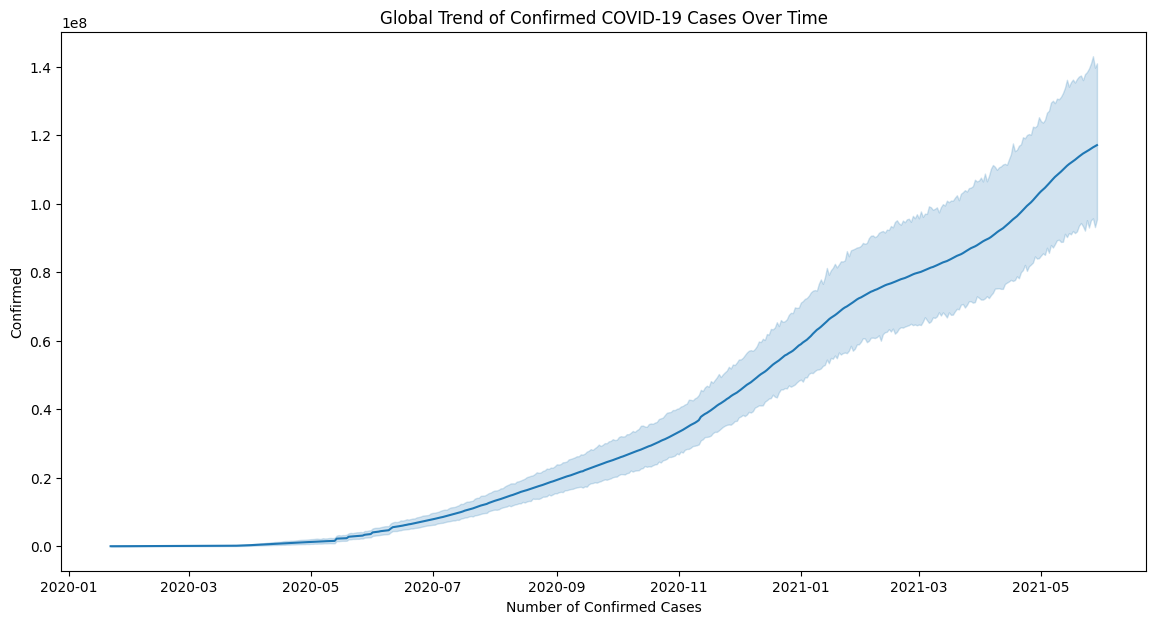

In [ ]:
# COVID cases over time

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.lineplot(x='ObservationDate' , y='Confirmed' , data=covid_data , estimator='sum')
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Number of Confirmed Cases')
plt.show()

<ipython-input-30-c91dbc839552>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index , x=top_countries.values , palette='viridis')


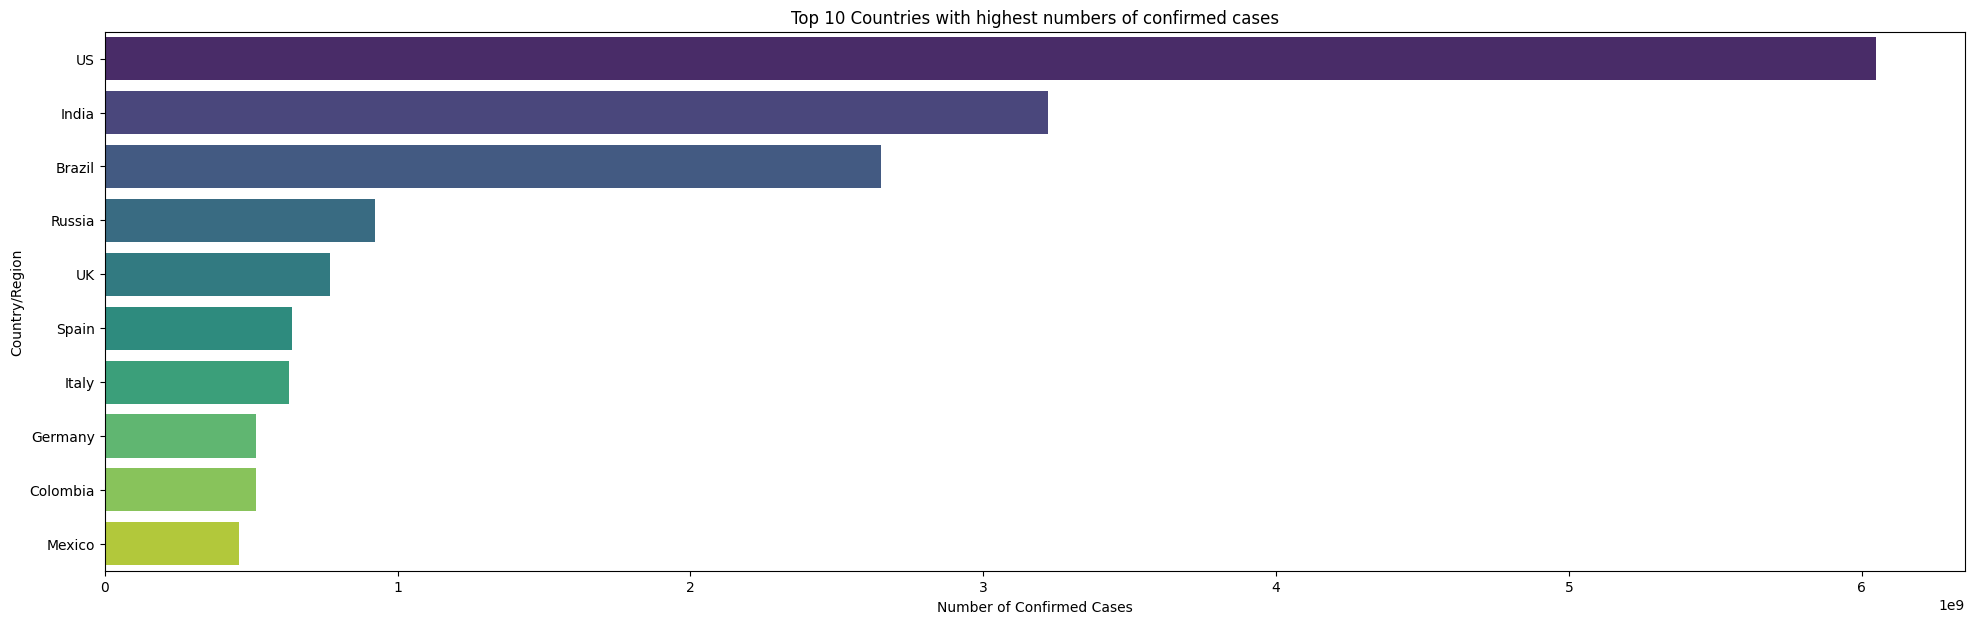

In [ ]:
# Top 10 countries with highest numbers of confiremd cases

top_countries = covid_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(24,7))
sns.barplot(y=top_countries.index , x=top_countries.values , palette='viridis')
plt.title('Top 10 Countries with highest numbers of confirmed cases')
plt.xlabel('Number of Confirmed Cases')
plt.show()

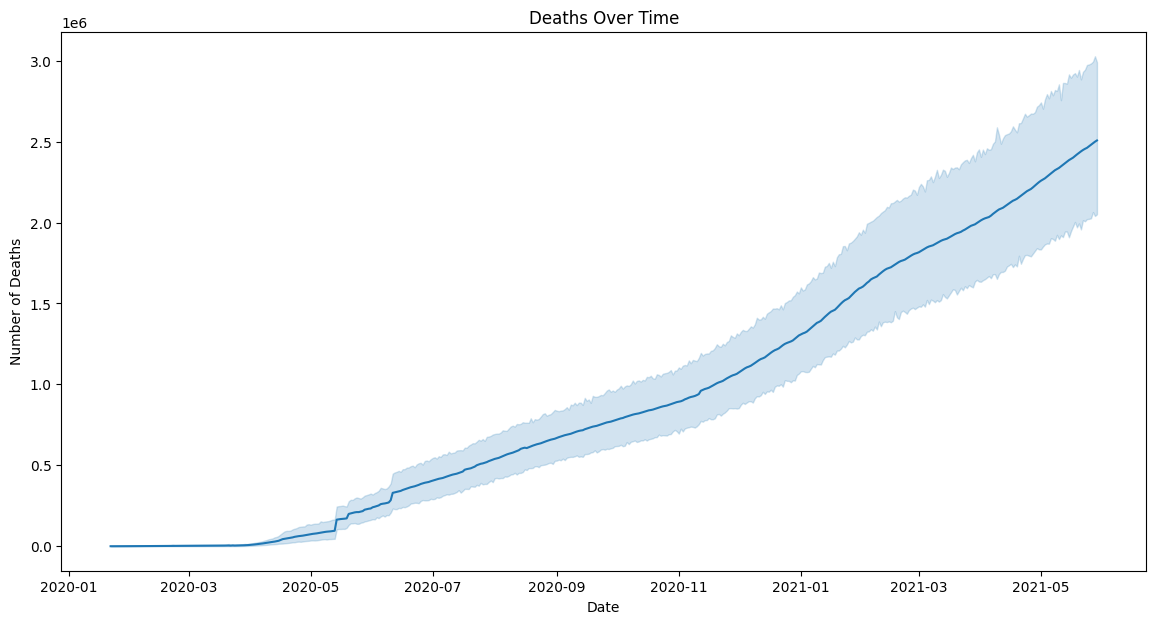

In [ ]:
# Deaths Over Time

plt.figure(figsize=(14,7))
sns.lineplot(x='ObservationDate' , y='Deaths' , data=covid_data, estimator = 'sum')
plt.title('Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

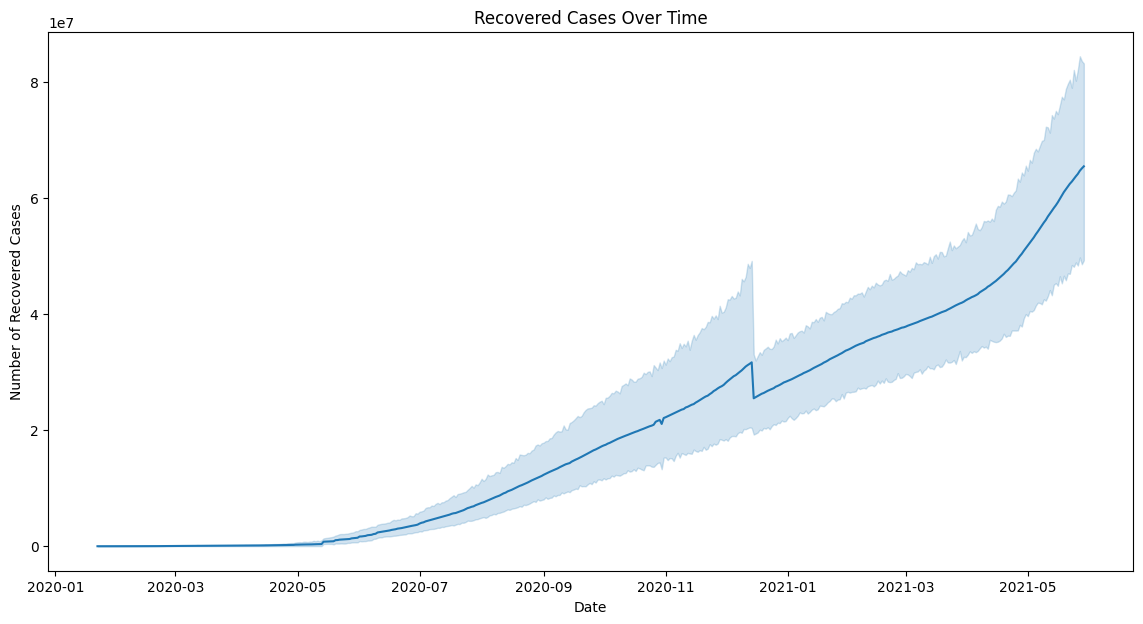

In [ ]:
# Recovered Cases Over Time

plt.figure(figsize=(14,7))
sns.lineplot(x='ObservationDate' , y= 'Recovered' , data=covid_data, estimator = 'sum')
plt.title('Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recovered Cases')
plt.show()

In [ ]:
# Preparing the data for modelling

covid_data['Days'] = (covid_data['ObservationDate'] - covid_data['ObservationDate'].min()).dt.days
X= covid_data[['Days']]
y= covid_data[['Confirmed']]

# Spliting the data into a training set and a testing set

from sklearn.model_selection import train_test_split
X_train , X_test  , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

# Train Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train , y_train)

# Predictions

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test , y_pred)
print(f'Mean Squared Error : {mse}')



Mean Squared Error : 58330979315.23966


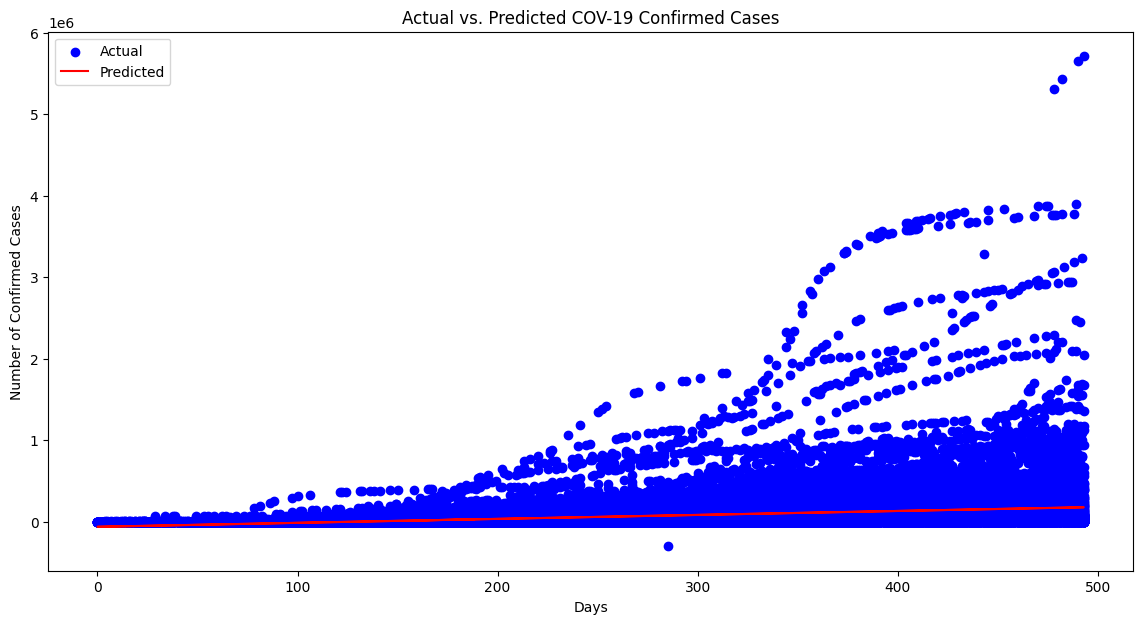

In [ ]:
# Plotting the results

plt.figure(figsize=(14,7))
plt.scatter(X_test , y_test , color='blue' , label= 'Actual')
plt.plot(X_test , y_pred , color='red' , label = 'Predicted')
plt.title('Actual vs. Predicted COV-19 Confirmed Cases')
plt.xlabel('Days')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.show()